# **(ADD THE NOTEBOOK NAME HERE)**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Average Salary by Experience Level

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

In [2]:
import os
current_dir = os.getcwd()
current_dir

'd:\\Documents\\TC Tanzila\\code Ins\\Capstone\\Global-_AI_Job_Market_Salary_Trends_2025\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'd:\\Documents\\TC Tanzila\\code Ins\\Capstone\\Global-_AI_Job_Market_Salary_Trends_2025'

In [5]:
raw_data_dir = os.path.join(current_dir, 'data/raw') #path directory

processed_data_dir = os.path.join(current_dir, 'data/clean') #path directory

# Basic Data Visualization 

## Import Libraries and Packages

Loading Python packages that we will be using in this project to carry out the analysis. For example Numpy to compute numerical operations and handle arrays, Pandas for data manipulation and analysis, Matplotlib, Seaborn and Plotly to create different data visualisations, SciPy for optimization, linear algebra, integration etc, sklearn for machine learning.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import f_oneway, ttest_ind, kruskal
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency, kurtosis, skew
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

## Load Cleaned Data

Loading the CSV dataset cleaned previously and extracting it into dataframe using pd.read_csv() function

In [7]:
df= pd.read_csv(os.path.join(processed_data_dir, 'ai_job_dataset_cleaned.csv'))
df

,job_id,job_title,salary_usd,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5,Smart Analytics
1,AI00002,AI Software Engineer,61895,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5,TechCorp Inc
2,AI00003,AI Specialist,152626,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9,Autonomous Tech
3,AI00004,NLP Engineer,80215,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8,Future Systems
4,AI00005,AI Consultant,54624,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6,Advanced Robotics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,AI14996,Robotics Engineer,38604,EN,FL,Finland,S,Finland,50,"Java, Kubernetes, Azure",Bachelor,1,Energy,2025-02-06,2025-03-25,1635,7,Advanced Robotics
14996,AI14997,Machine Learning Researcher,57811,EN,CT,United Kingdom,M,United Kingdom,0,"Mathematics, Docker, SQL, Deep Learning",Master,0,Government,2024-10-16,2024-10-30,1624,8,Smart Analytics
14997,AI14998,NLP Engineer,189490,EX,CT,South Korea,L,South Korea,50,"Scala, Spark, NLP",Associate,17,Manufacturing,2024-03-19,2024-05-02,1336,7,AI Innovations
14998,AI14999,Head of AI,79461,EN,FT,Netherlands,M,Netherlands,0,"Java, Computer Vision, Python, TensorFlow",PhD,1,Real Estate,2024-03-22,2024-04-23,1935,5,Smart Analytics


## General Trends and Insights from the Data

### Average Salary by Experience Level

In [ ]:
# Average Salary by Experience Level
avg_Salary_by_EX_lvl=df.groupby('experience_level')['salary_usd'].mean()
# Round and convert to integer (int64)
avg_Salary_by_EX_lvl = avg_Salary_by_EX_lvl.round(0).astype('int64')

# Reorder the index to a meaningful order
order = ['EN', 'MI', 'SE', 'EX']
avg_Salary_by_EX_lvl = avg_Salary_by_EX_lvl.reindex(order)

# Display result
print("Average Salary by Experience Level (in USD, int64):")
print(avg_Salary_by_EX_lvl)

Average Salary by Experience Level (in USD, int64):
experience_level
EN     63133
MI     87955
SE    122188
EX    187724
Name: salary_usd, dtype: int64


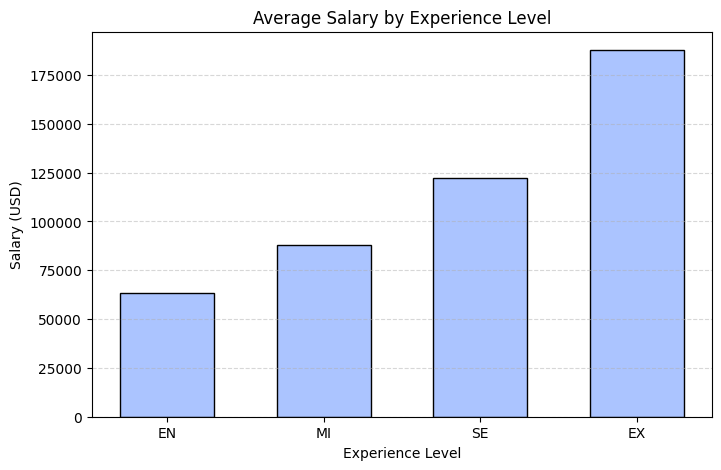

In [9]:
#average salary by experience level
#EN (Entry), MI (Mid), SE (Senior), EX (Executive)
y=avg_Salary_by_EX_lvl.values
x=avg_Salary_by_EX_lvl.index 
plt.figure(figsize=(8,5))
plt.bar(x, y, color="#abc4ff", edgecolor='black', width=0.6)
plt.title("Average Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Salary (USD)")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


**Insight:**

- The average salary tends to increase with experience level, with senior positions commanding significantly higher salaries.
- AI professionals with executive-level experience earn on average 2.5× higher salaries than entry-level employees.
- his indicates strong salary growth with experience and highlights the importance of employee retention and upskilling programs.

## Average Remote Ratio by Employment Type
remote_ratio:	0 (No remote), 50 (Hybrid), 100 (Fully remote)
employment_type	FT (Full-time), PT (Part-time), CT (Contract), FL (Freelance)

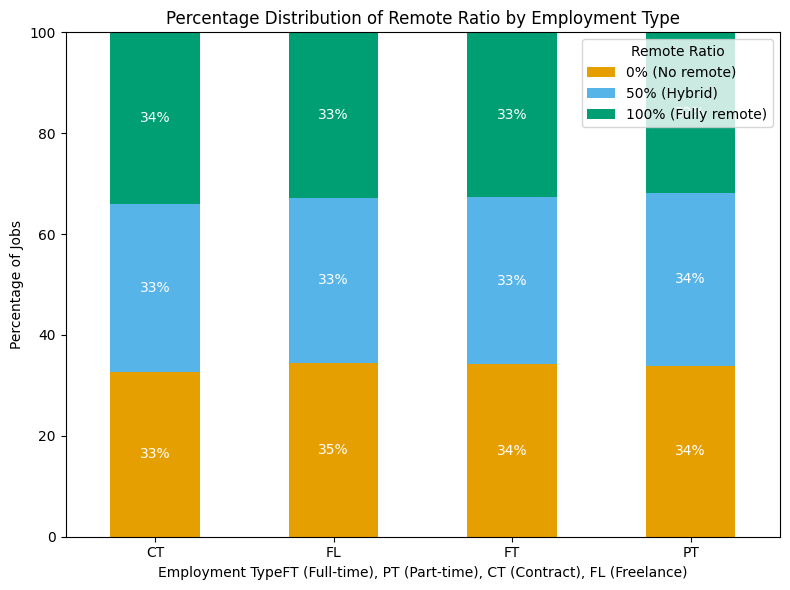

In [18]:
# Count the occurrences of each remote_ratio per employment_type
remote_counts = df.groupby(['employment_type', 'remote_ratio']).size().unstack(fill_value=0)

# Convert counts to percentages
remote_percent = remote_counts.div(remote_counts.sum(axis=1), axis=0) * 100

# Plot stacked bar chart with percentages
ax = remote_percent.plot(kind='bar', stacked=True, color=['#E69F00', '#56B4E9', '#009E73'], figsize=(8,6))

# Add percentage labels on each segment
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if height > 0:  # Only label segments with non-zero height
        ax.text(p.get_x() + width/2, p.get_y() + height/2, f'{height:.0f}%', ha='center', va='center', color='white', fontsize=10)

plt.title("Percentage Distribution of Remote Ratio by Employment Type")
plt.xlabel("Employment TypeFT (Full-time), PT (Part-time), CT (Contract), FL (Freelance)")
plt.ylabel("Percentage of Jobs")
plt.legend(title="Remote Ratio", labels=["0% (No remote)", "50% (Hybrid)", "100% (Fully remote)"])
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()
        

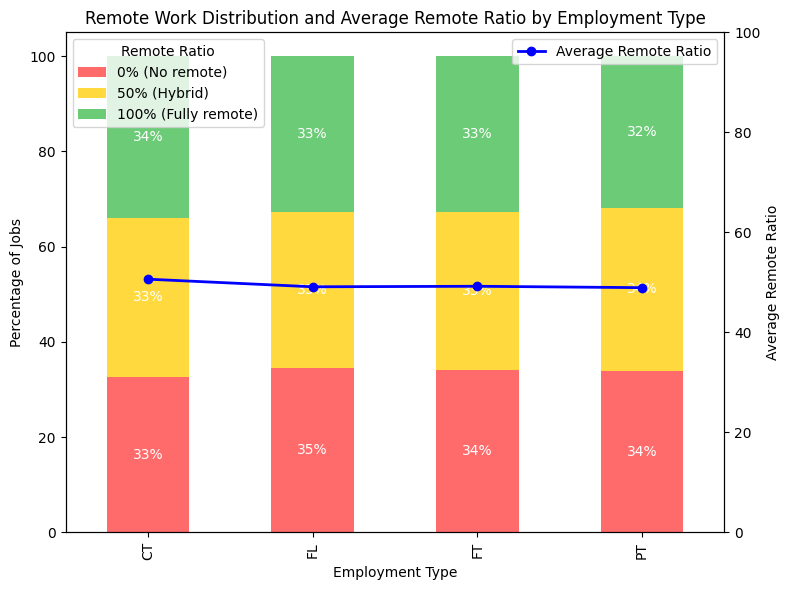

In [17]:

# Step 1: Count occurrences of each remote_ratio per employment_type
remote_counts = df.groupby(['employment_type', 'remote_ratio']).size().unstack(fill_value=0)

# Step 2: Convert counts to percentages
remote_percent = remote_counts.div(remote_counts.sum(axis=1), axis=0) * 100

# Step 3: Calculate average remote ratio per employment type
avg_remote = df.groupby('employment_type')['remote_ratio'].mean()

# Step 4: Plot stacked bar chart
fig, ax = plt.subplots(figsize=(8,6))
colors = ['#FF6B6B', '#FFD93D', '#6BCB77']
remote_percent.plot(kind='bar', stacked=True, color=colors, ax=ax)

# Step 5: Plot average remote ratio as a line
ax2 = ax.twinx()
ax2.plot(range(len(avg_remote)), avg_remote.values, color='blue', marker='o', linewidth=2, label='Average Remote Ratio')
ax2.set_ylabel('Average Remote Ratio')
ax2.set_ylim(0, 100)

# Step 6: Add percentage labels on stacked bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if height > 0:
        ax.text(p.get_x() + width/2, p.get_y() + height/2, f'{height:.0f}%', ha='center', va='center', color='white', fontsize=10)

# Step 7: Final touches
ax.set_xlabel("Employment Type")
ax.set_ylabel("Percentage of Jobs")
ax.set_title("Remote Work Distribution and Average Remote Ratio by Employment Type")
ax.set_xticks(range(len(remote_percent.index)))
ax.set_xticklabels(remote_percent.index)
ax.legend(title="Remote Ratio", labels=["0% (No remote)", "50% (Hybrid)", "100% (Fully remote)"], loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

---

# Section 2

Section 2 content

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [11]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block after 'try' statement on line 2 (553063055.py, line 5)